In [1]:
%matplotlib inline

import warnings
from text_unidecode import unidecode
from collections import deque
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
import networkx as nx
import osmnx as ox
import pandas as pd #you will use np and pd if you are going to do query, it is generally faster
import numpy as np
import folium
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:

n_clusters= 10

Tsne_data = {}
path = "emb"
x=[]
with open(path, 'r', encoding='utf8') as f:  ## 這個文檔的格式是一行一個字並配上他的向量，以空白鍵分隔
    for line in f:  
        tokens = line.split()
        token = tokens[0]  ## 第一個token就是詞彙
        vec = tokens[1:]  ## 後面的token向量
        x.append(vec)  ## 把整個model做成一個字典，以利查找字對應的向量

x
del x[0]

Tsne_data = np.array(x, dtype=np.float32)
data=Tsne_data
Tsne_data

array([[-1.2842236e+01,  4.3928156e+00, -2.0913119e+00, ...,
         6.9004946e+00, -3.9186261e+00,  8.5888653e+00],
       [-1.0612859e+00, -5.7955581e-01, -1.0521069e+01, ...,
         1.0272665e+01,  5.7694507e+00,  4.3723841e+00],
       [-1.1107963e+01, -1.7748369e-01,  2.9160419e+00, ...,
         6.0289965e+00,  6.9413815e+00, -6.2928028e-02],
       ...,
       [ 1.5574330e-01, -9.9239573e-02, -6.8564706e-02, ...,
        -1.3104130e-01,  2.1637376e-02,  3.2416946e-01],
       [-2.2971512e-01,  3.7245035e-01,  1.1594241e-01, ...,
         1.6973574e-01,  1.6163221e-02,  4.2369789e-01],
       [-4.8850216e-02,  7.8554474e-02, -5.4066941e-02, ...,
         2.0493528e-02,  9.8569039e-03,  1.3229062e-01]], dtype=float32)

In [ ]:
tsne = TSNE(n_components=2, random_state=0,perplexity=50)
Trained_tsne = tsne.fit_transform(Tsne_data)
len(Trained_tsne)
Trained_tsne

In [56]:
 clustering=DBSCAN(eps=1,min_samples=70).fit(Trained_tsne)

list(clustering.labels_)

[0,
 0,
 170,
 -1,
 142,
 0,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 91,
 0,
 2,
 -1,
 0,
 3,
 -1,
 300,
 0,
 0,
 326,
 0,
 287,
 0,
 0,
 -1,
 -1,
 4,
 122,
 -1,
 5,
 -1,
 0,
 -1,
 0,
 -1,
 0,
 0,
 -1,
 57,
 6,
 0,
 287,
 0,
 7,
 0,
 -1,
 -1,
 -1,
 292,
 0,
 8,
 0,
 0,
 -1,
 286,
 0,
 192,
 -1,
 201,
 -1,
 292,
 108,
 9,
 0,
 -1,
 0,
 0,
 -1,
 0,
 5,
 0,
 170,
 0,
 -1,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 -1,
 142,
 194,
 -1,
 300,
 0,
 0,
 0,
 6,
 127,
 228,
 0,
 305,
 0,
 -1,
 0,
 2,
 -1,
 2,
 0,
 0,
 -1,
 -1,
 0,
 0,
 10,
 11,
 0,
 -1,
 -1,
 95,
 -1,
 12,
 0,
 0,
 140,
 0,
 0,
 286,
 13,
 57,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 0,
 5,
 0,
 14,
 4,
 228,
 -1,
 0,
 0,
 0,
 57,
 0,
 3,
 -1,
 53,
 0,
 0,
 -1,
 -1,
 6,
 0,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 15,
 0,
 0,
 47,
 -1,
 0,
 307,
 0,
 -1,
 -1,
 0,
 358,
 -1,
 -1,
 -1,
 0,
 6,
 211,
 0,
 -1,
 339,
 -1,
 1,
 127,
 101,
 -1,
 -1,
 -1,
 173,
 0,
 9,
 0,
 0,
 -1,
 -1,
 0,
 -1,
 77,
 -1,
 0,
 0,
 16,
 17,
 -1,
 -1,
 -1,
 0,

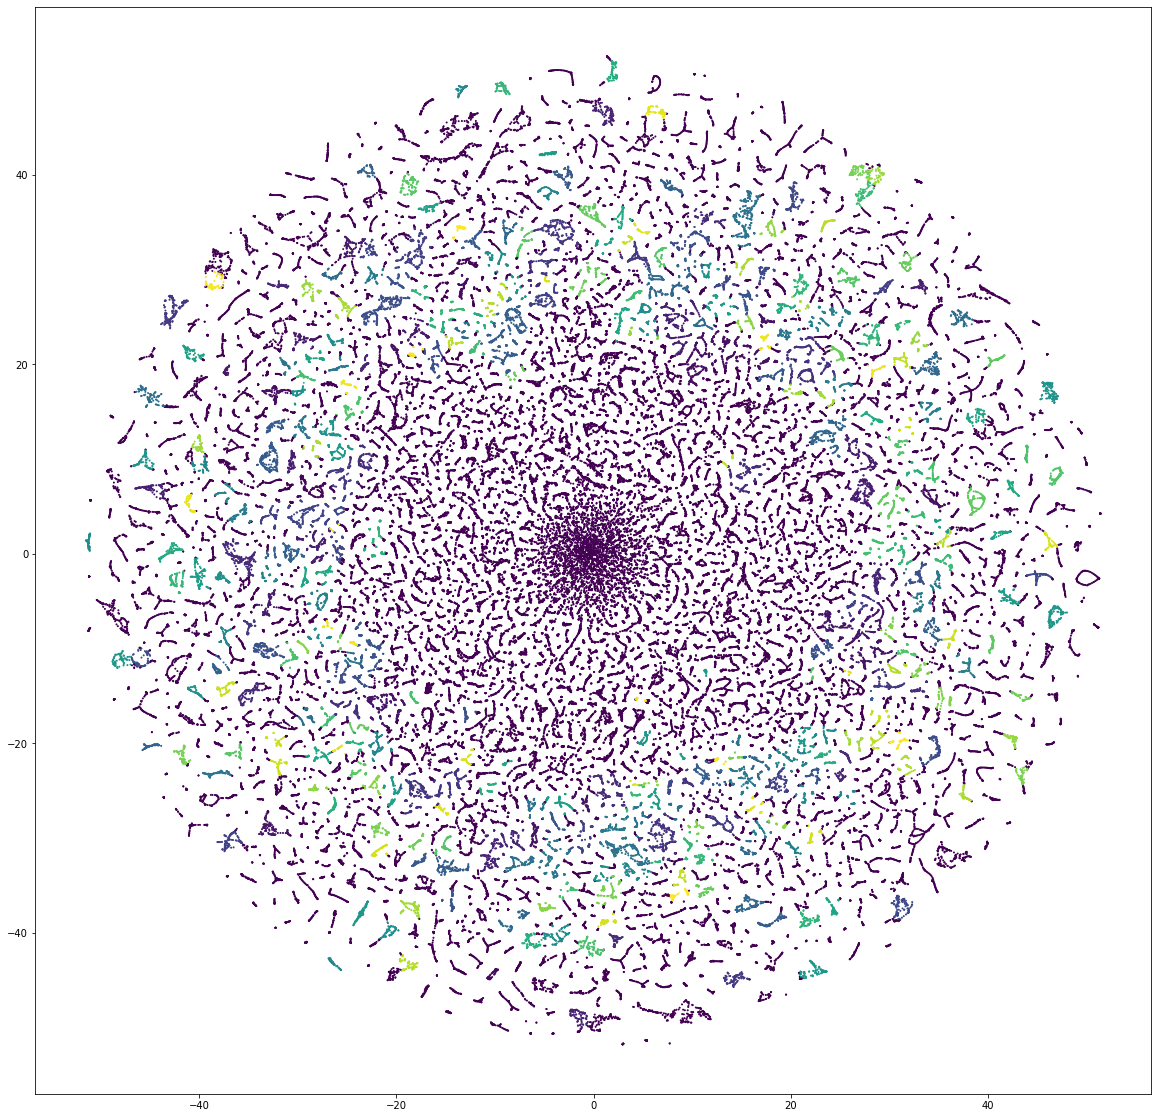

In [57]:
plt.scatter(Trained_tsne[:,0],Trained_tsne[:,1],c=clustering.labels_,s=1)
plt.gcf().set_size_inches((20, 20)) 

In [62]:
path = "emb"
osm=[]
with open(path, 'r', encoding='utf8') as f:  ## 這個文檔的格式是一行一個字並配上他的向量，以空白鍵分隔
    for line in f:  
        tokens = line.split()
        token = tokens[0]  ## 第一個token就是詞彙
        vec = tokens[1:]  ## 後面的token向量
        osm.append(token)  ## 把整個model做成一個字典，以利查找字對應的向量
        #count += 1
#vec_dimensions = len(word_vec_mapping.get('men'))  ## 記錄這個mdoel每一個字的維度
del osm [0]

labelwithid=list(zip(osm,clustering.labels_))

In [63]:
import networkx as nx
import osmnx as ox
import pandas as pd 
import numpy as np
from pandas import DataFrame
data = pd.read_csv('uber_madrid.csv', usecols=['osm_way_id', 'speed_kph_mean'])
mean = data.groupby(['osm_way_id']).mean()

G = ox.graph_from_place('Madrid', network_type='drive',simplify=False)
nodes, edges = ox.graph_to_gdfs(G)

In [64]:
locat = nodes
locat=locat.reset_index(level='osmid')

In [66]:
new = folium.Map(location=[40.416775, -3.703790], zoom_start=12, tiles="Stamen Terrain")
color = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
for y in labelwithid :
    if y[1]==30:
        folium.Marker(
        location=[locat.loc[(locat['osmid']==int(y[0]))]["y"].values[0], locat.loc[(locat['osmid']==int(y[0]))]["x"].values[0]],
        popup=y,
        icon=folium.Icon(color='red', icon='info-sign'),
        ).add_to(new)
new

In [72]:
mean=np.load('meanspeed.npy',allow_pickle=True)
mean

array([[3996189, 100.74883333333332, 23001195, ..., nan, nan,
       [3996189, 100.74883333333332, 23001220, ..., nan, nan,
       [3996189, 100.74883333333332, 23001944, ..., nan, nan,
       ...,
       [699286587, 29.41475, 6549083955, ..., nan, nan,
       [699385225, 27.389875, 26066630, ..., nan, nan,
       [699385225, 27.389875, 26066631, ..., nan, nan,
      dtype=object)

In [73]:
mean_df = pd.DataFrame(mean, columns = ['osmid','speed_mph_mean','u','v','key','oneway','lanes','name', 'highway', 'maxspeed', 'length', 'ref', 'junction', 'bridge', 'access', 'tunnel', 'est_width', 'landuse', 'width', 'geometry'])

In [74]:
mean_df["speed_mph_mean"].mean()

38.40892085262914

In [76]:
!tar chvfz version1.tar.gz *


Feature.ipynb
Madrid.edgelist
Madrid_N2V-Copy1.ipynb
Madrid_N2V.ipynb
Madrid_OSM.ipynb
Untitled.ipynb
cache/
cache/514eec15f77e131e2dd297f68ca821f65081d2a8.json
cache/28885ee83bb696765e29c4369d9a30e4906066b7.json
compacity.txt
emb
emb_128
emb_128-Copy1
end_emb.npy
end_emb_128.npy
highway&maxspeed.edgelist
highway.npy
keras-testing.ipynb
keras.ipynb
lanes.npy
madrid_length.edgelist
maxspeed.npy
meanspeed-Copy4.ipynb
meanspeed.npy
meanspeed_only.npy
n2v_merge.ipynb
node_highway.npy
nodetype.npy
npy_backup/
npy_backup/maxspeed-Copy1.npy
npy_backup/highway-Copy1.npy
npy_backup/lanes-Copy1.npy
npy_backup/start_emb-Copy1.npy
npy_backup/end_emb-Copy1.npy
npy_backup/node_highway-Copy1.npy
npy_backup/start_emb_128-Copy1.npy
npy_backup/oneway-Copy1.npy
npy_backup/meanspeed-Copy1.npy
npy_backup/end_emb_128-Copy1.npy
oneway.npy
split/
split/oneway_train.npy
split/maxspeed_train.npy
split/lanes_test.npy
split/meanspeed_test.npy
split/meanspeed_train.npy
split/lanes_train.npy
split/n2v_start_train.n